In [54]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('College_data.csv')
data

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [5]:
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
data.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))

In [9]:
#Dimensionality Reduction using PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

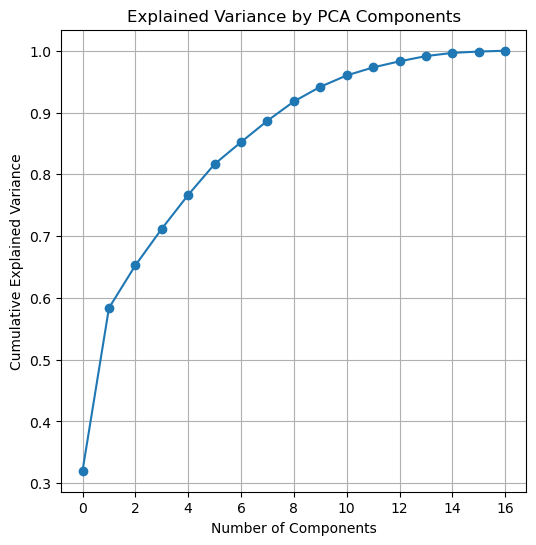

In [11]:
plt.figure(figsize=(6, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [12]:
# Select optimal number of components 
optimal_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"\nOptimal number of components: {optimal_components}")
pca = PCA(n_components=optimal_components)
pca_data = pca.fit_transform(scaled_data)


Optimal number of components: 11


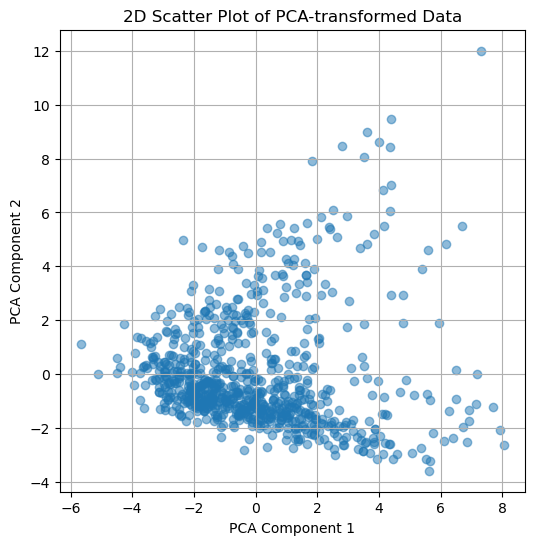

In [49]:
plt.figure(figsize=(6, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Scatter Plot of PCA-transformed Data')
plt.grid()
plt.show()

In [42]:
def experiment_dbscan(pca_data):
    eps_values = [0.3, 0.5, 0.7]
    min_samples_values = [3, 5, 7]
    best_score = -1
    best_params = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(pca_data)
            # Check if DBSCAN found more than 1 cluster (ignoring noise labeled as -1)
            if len(set(clusters)) > 1:
                score = silhouette_score(pca_data, clusters)
                print(f"EPS: {eps}, Min Samples: {min_samples}, Silhouette Score: {score:.2f}")
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)

    if best_params is None:
        print("No valid clustering configuration found. Please try different parameters.")
        return None
    return best_params


In [48]:
# Finding the best DBSCAN parameters
best_params = experiment_dbscan(pca_data)
if best_params is None:
    print("Unable to find best DBSCAN parameters. Exiting.")
else:
    best_eps, best_min_samples = best_params
    print(f"\nBest Parameters - EPS: {best_eps}, Min Samples: {best_min_samples}")


No valid clustering configuration found. Please try different parameters.
Unable to find best DBSCAN parameters. Exiting.


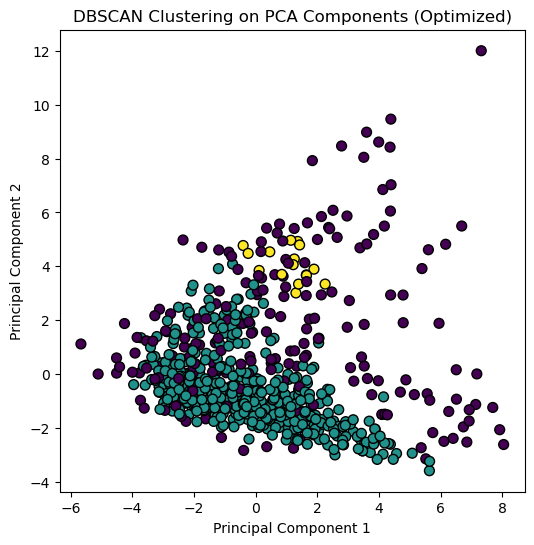

In [71]:
# Define ranges of parameters to try
eps_values = np.linspace(0.1, 2.0, 20)  # eps values to try
min_samples_values = [3, 5, 7, 10]     # min_samples values to try

best_score = -1
best_eps = None
best_min_samples = None
best_labels = None

# Try different combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN with current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(pca_data)
        
        # Ignore configurations where all points are labeled as noise (-1)
        if len(np.unique(labels)) > 1:  
            score = silhouette_score(pca_data, labels)
            
            # Check if the current configuration gives a better score
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels

plt.figure(figsize=(6, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=best_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('DBSCAN Clustering on PCA Components (Optimized)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()